## Quick Colorgram notebook

This notebook will quickly generate a colorgram for a searched word.

In [1]:
import compsyn
import os

In [2]:
from compsyn.helperfunctions import settings, search_and_download, run_google_vision, write_img_classifications_to_file

In [3]:
from compsyn.wordnet_functions import get_wordnet_tree_data

In [4]:
GOOGLE_APPLICATION_CREDENTIALS = "compsyn3-8cf6580619a9.json"

In [5]:
DRIVER_PATH = "/usr/local/bin/geckodriver"

In [6]:
settings(
    application_cred_name = GOOGLE_APPLICATION_CREDENTIALS,
    driver_browser = "Firefox",
    driver_executable_path = DRIVER_PATH,
    driver_options = ["--headless"]
)

In [7]:
number_images = 100 
home = os.getcwd()

In [8]:
search_terms = ['explore']

In [9]:
img_urls_dict = {}
for search_term in search_terms:
    print(search_term)
    urls = search_and_download(
        search_term = search_term, 
        driver_browser = "Firefox",
        driver_executable_path = DRIVER_PATH, 
        driver_options = ["--headless"],
        home = home, 
        number_images = number_images
    )
    img_urls_dict[search_term] = urls

explore
[2020-05-18 01:05:31,795] (fetch_image_urls)  INFO: Found: 200 search results. Extracting links from 0:200
[2020-05-18 01:06:17,992] (fetch_image_urls)  INFO: Found: 100 image links, done!


In [39]:
imagedata = compsyn.datahelper.ImageData()

In [11]:
imagedata.load_image_dict_from_folder("downloads/explore")

In [12]:
imageanalysis = compsyn.analysis.ImageAnalysis(imagedata)

In [13]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

In [14]:
compressed_image_dict = imageanalysis.get_composite_image()

[2020-05-18 00:23:54,342] (ImageAnalysis)  INFO: explore is being compressed.


In [15]:
imageanalysis.save_colorgram_to_disk() 

In [16]:
import PIL
import numpy as np

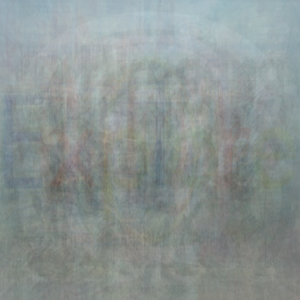

In [17]:
PIL.Image.fromarray(compressed_image_dict['explore'].astype(np.uint8))

### Colorgram options

The composite image function allows various parameters, to choose the first N images, to randomly sample from the 

In [18]:
compressed_image_50 = imageanalysis.get_composite_image(num_of_images=50)

[2020-05-18 00:24:03,593] (ImageAnalysis)  INFO: explore is being compressed.


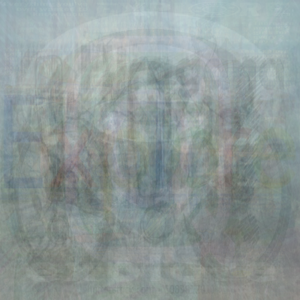

In [19]:
PIL.Image.fromarray(compressed_image_50['explore'].astype(np.uint8))

In [20]:
compressed_image_50_rev = imageanalysis.get_composite_image(num_of_images=50, reverse=True)

[2020-05-18 00:24:05,602] (ImageAnalysis)  INFO: explore is being compressed.


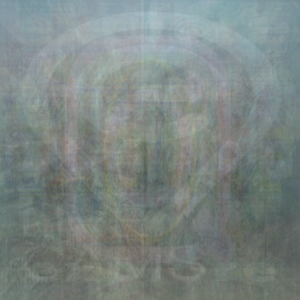

In [21]:
PIL.Image.fromarray(compressed_image_50_rev['explore'].astype(np.uint8))

In [22]:
compressed_image_sample = imageanalysis.get_composite_image(num_of_images=50, sample=True)

[2020-05-18 00:24:08,888] (ImageAnalysis)  INFO: explore is being compressed.


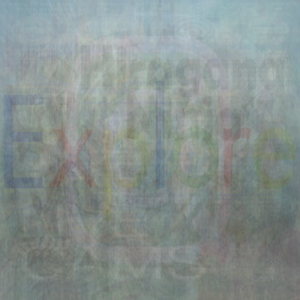

In [23]:
PIL.Image.fromarray(compressed_image_sample['explore'].astype(np.uint8))